In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

C:\Users\Arjav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Arjav\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


In [2]:
import os
import glob
dataset_path = "C:\\Users\\Arjav\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1"

train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")

# Check categories
categories = os.listdir(train_dir)
print("Categories:", categories)


Categories: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

IMG_SIZE = (128, 128)  # Resize images

def load_images_from_folder(folder):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign label (0-3)
        for image_path in glob.glob(category_path + "/*.jpg"):  # Adjust if needed
            img = load_img(image_path, target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing datasets
X_train, y_train = load_images_from_folder(train_dir)
X_test, y_test = load_images_from_folder(test_dir)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data: {X_test.shape}, Labels: {y_test.shape}")


Training Data: (5712, 128, 128, 3), Labels: (5712,)
Testing Data: (1311, 128, 128, 3), Labels: (1311,)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Ensure labels are correctly shaped
y_train = tf.keras.utils.to_categorical(np.array(y_train).reshape(-1), num_classes=4)
y_test = tf.keras.utils.to_categorical(np.array(y_test).reshape(-1), num_classes=4)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train)

# Optimized CNN Model
model = Sequential([
    Input(shape=(128,128,3)),  # Use Input() instead of input_shape in Conv2D
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    GlobalAveragePooling2D(),  # More efficient than Flatten
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4-class classification
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1)

# Train the model with data augmentation
model.fit(datagen.flow(X_train, y_train, batch_size=32, shuffle=True),
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[lr_scheduler])


C:\Users\Arjav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.6325 - loss: 0.9223 - val_accuracy: 0.2288 - val_loss: 3.3353 - learning_rate: 0.0010
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.7609 - loss: 0.6168 - val_accuracy: 0.2571 - val_loss: 4.5899 - learning_rate: 0.0010
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.7946 - loss: 0.5381 - val_accuracy: 0.4386 - val_loss: 2.9035 - learning_rate: 0.0010
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.8382 - loss: 0.4322 - val_accuracy: 0.7803 - val_loss: 0.5440 - learning_rate: 0.0010
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.8510 - loss: 0.3895 - val_accuracy: 0.4744 - val_loss: 1.5487 - learning_rate: 0.0010
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.8563 - loss: 0.3741
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
179/179 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.8564 - loss: 0.

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8275 - loss: 0.4519
Test Accuracy: 82.38%


In [6]:
import os
import glob
test_images = glob.glob("C:\\Users\\Arjav\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1\\Testing\\glioma\\Te-gl_0203.jpg")

print("Example test image:", test_images[0])  # Print first test image path

Example test image: C:\Users\Arjav\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing\glioma\Te-gl_0203.jpg


In [7]:
def predict_mri(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_label = categories[np.argmax(prediction)]

    print("Predicted Tumor Type:", predicted_label)
# Example: Predict a test MRI scan
predict_mri("C:\\Users\\Arjav\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1\\Testing\\glioma\\Te-gl_0203.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
Predicted Tumor Type: glioma


In [8]:
model.save("model.keras")  # New Keras format
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



Expected Input Shape: (128, 128)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


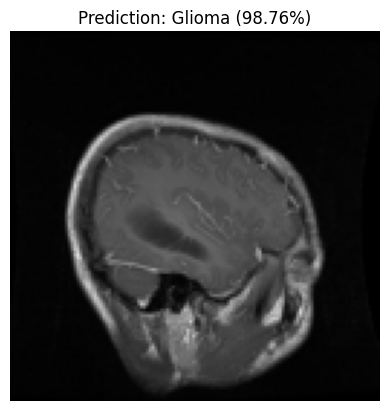

In [11]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("model.keras", compile=False)

# Get input shape of the model
input_shape = model.input_shape[1:3]  # (height, width)
print(f"Expected Input Shape: {input_shape}")

# Define class labels (Modify as per dataset)
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Replace file upload with a local file path
image_path = "C:\\Users\\Arjav\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1\\Testing\\glioma\\Te-gl_0203.jpg"

# Load and preprocess the image
img = Image.open(image_path).convert("RGB")
img = img.resize(input_shape)  # Resize to match model input size
img_array = np.array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
confidence = np.max(predictions) * 100

# Display image and prediction result
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence:.2f}%)")
plt.show()